# Capstone Project

## Background

We are glad you have successfully reached the capstone project part of "Data Science Fundamentals" course. You will put everything 
you have learned so far about data science to work. The outcome of this module should potentially serve as your portfolio item.

Unlike with previous projects, this time you are free to choose a dataset to explore from three suggested ones. As you will have to solve a provided problem, there will not be list of predefined questions that you have to answer - be creative and explore any dimensions of data you deem worth analyzing.

Although this might seem scary, this is how data science looks like in the industry. Often, it's your responsibility to not only give answers using the data, but also raise questions. The more creatively you look at this project, the better. Good luck!

----

## Requirements

Whichever problem you choose to analyze, general requirements are as follow:

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* Visualize data with dimensionality reduction algorithms.
* Perform cluster analysis.
* Use a linear model to explain relationships and predict new values.

#### Presentation
* Present the project - the data, methods and results.

# Problems

## COVID-19 crisis 

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country **have to create and prove a plan of fighting the pandemics in your country** by analyzing the provided data. You must get most important insights using learned data science techniques and present them to the lead of your country.

### Notes
- Policy impact on cases
- How fast virus spreads
- Region data on spread
- Weather and cases relation
- Virus by age groups

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="dark")

In [3]:
case = pd.read_csv("/content/Case.csv")
policy = pd.read_csv("/content/Policy.csv", index_col="policy_id")
patient_info = pd.read_csv("/content/PatientInfo.csv")
time_age = pd.read_csv("/content/TimeAge.csv")
time = pd.read_csv("/content/Time.csv")

In [4]:
time_age['date'] = pd.to_datetime(time_age.date)
time['date'] = pd.to_datetime(time.date)
policy.index = pd.to_datetime(policy.start_date)
policy.drop(columns="start_date", inplace=True)

Cheking for missing values

policy has some missing ```details``` and ```end_date```
patient_info has a lot of ```nan```

In [ ]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2020-01-03 to 2020-05-28
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     61 non-null     object
 1   type        61 non-null     object
 2   gov_policy  61 non-null     object
 3   detail      59 non-null     object
 4   end_date    24 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB


### EDA

#### Cases by age

How deadly and infectious COVID is 

In [33]:
(time_age.date.iloc[-1] - time_age.date.iloc[0])

Timedelta('120 days 00:00:00')

In [34]:
time_age.date.iloc[0], time_age.date.iloc[-1]

(Timestamp('2020-03-02 00:00:00'), Timestamp('2020-06-30 00:00:00'))

In [35]:
time_by_age = time_age.groupby("age")[['confirmed', 'deceased']].sum()
confirmed_sum = time_by_age.confirmed.sum()
time_by_age

,confirmed,deceased
age,,
0s,16107,0
10s,68752,0
20s,345827,0
30s,137539,194
40s,168250,295
50s,230030,1537
60s,158505,3743
70s,82107,7599
80s,54086,12136


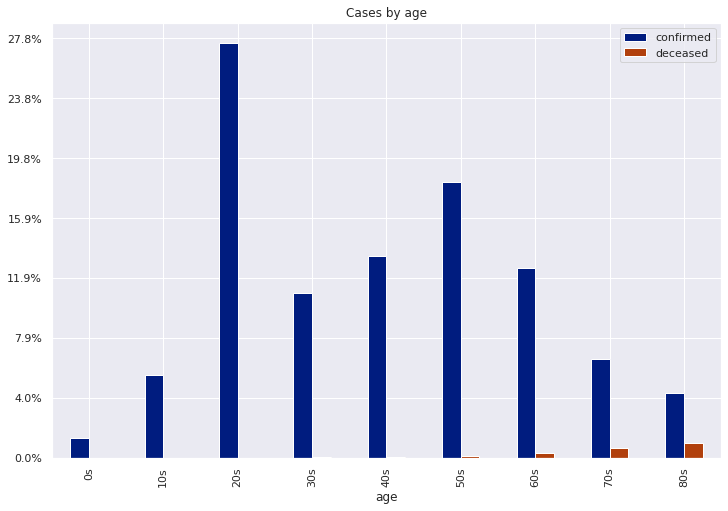

In [36]:
import matplotlib.ticker as mtick
time_by_age.plot(kind="bar", figsize=(12, 8), title="Cases by age").yaxis.set_major_formatter(mtick.PercentFormatter(confirmed_sum))

As we can see most of the people get the virus in their 20s followed by 50s and the biggest spike in death is after 60s

#### Policies

In [37]:
policy.head()

,country,type,gov_policy,detail,end_date
start_date,,,,,
2020-01-03,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-19
2020-01-20,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-27
2020-01-28,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-02-22
2020-02-23,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),NaN
2020-02-04,Korea,Immigration,Special Immigration Procedure,from China,NaN


In [38]:
policy['type'].value_counts()

Education         15
Immigration       15
Health            10
Technology         6
Social             5
Alert              4
Administrative     3
Transformation     3
Name: type, dtype: int64

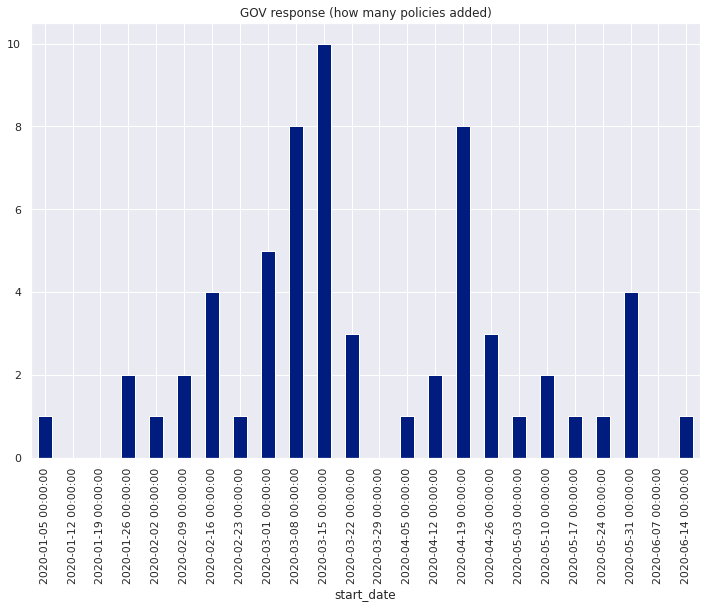

In [39]:
policy.resample('W').count()['type'].plot(kind='bar',  figsize=(12, 8), title="GOV response (how many policies added)")

Key date seems to be the May 15th

So we could use it as a key point for our analysis

#### Patients

In [40]:
patient_info.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


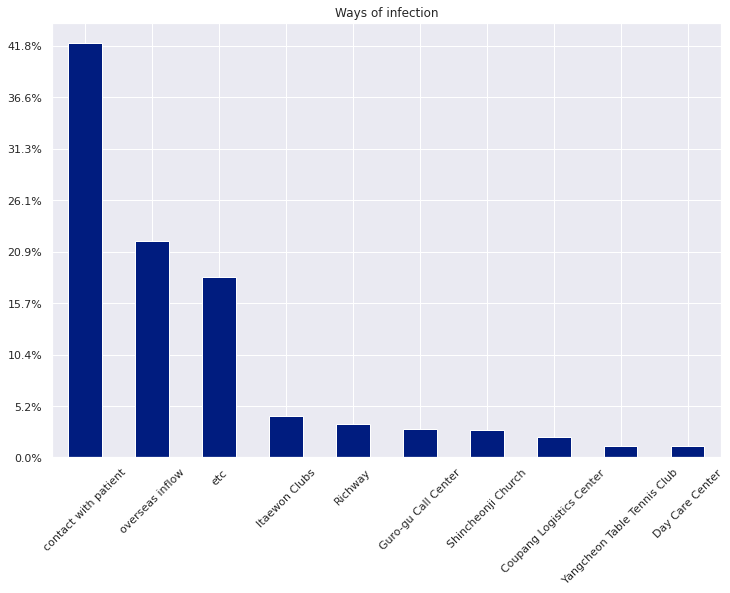

In [41]:
data = patient_info.infection_case.value_counts()[:10]
data.plot(kind='bar', figsize=(12, 8), rot='45', title="Ways of infection").yaxis.set_major_formatter(mtick.PercentFormatter(data.sum()))

#### Cases

Lets see how much of the impact policies had on the spread

In [56]:
values = time.resample("D", on="date").sum()

In [43]:
policy_list = [True if x in policy.index else False for x in values.index] * values['confirmed']
policy_list = policy_list.replace(0, np.nan)

Text(0.5, 1.0, 'Case and policy timeline')

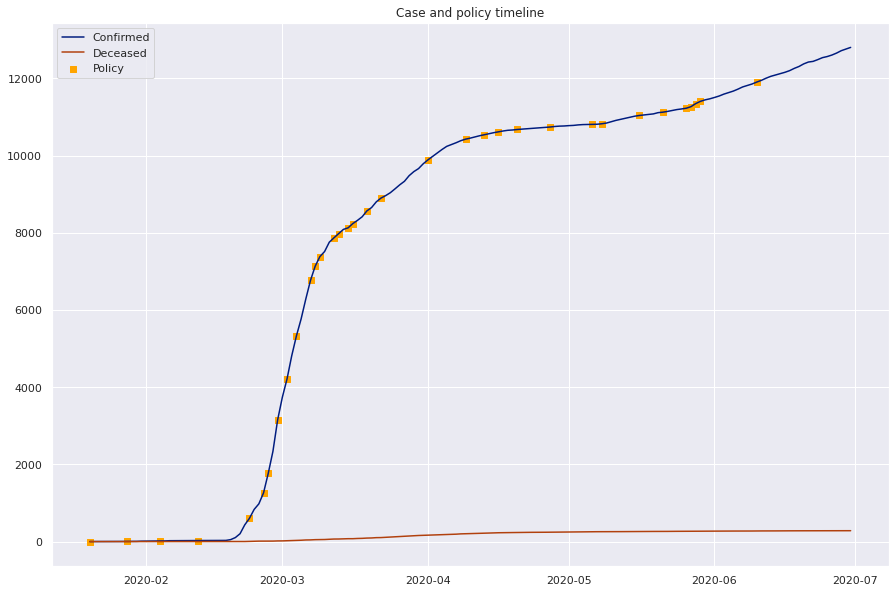

In [44]:
plt.figure(figsize=(15, 10))
plt.plot(values.index, values.confirmed)
plt.plot(values.index, values.deceased)
plt.scatter(policy_list.index, policy_list.values, marker='s', color='orange')
plt.legend(["Confirmed", "Deceased", 'Policy'])
plt.title("Case and policy timeline")

### Statistical testing

Most policies happend to take place in the end of May while majoraty of them focused on school closures and travel restrictions

Lets test how did those restrictions impacted the biggest groups:

- people in their 20s who have the biggest positive tests
- and older people (over 60) who have the biggest death rate

Null hypotesis being there is no difference
and alternative hypotesis being there is a difference 


Will calculate proportion of positive test results for both groups before and after the majority of the policies where accepted 
Alpha = 0.05


In [45]:
mask = time_age.date < '2020-03-23'
dates_before = time_age.date.loc[mask]
dates_before.shape

(189,)

In [46]:
dates_after = time_age.date.iloc[189: 189*2]
dates_after.shape

(189,)

In [47]:
assert dates_after.shape[0] ==  dates_before.shape[0]
n = dates_after.shape[0]
n

189

Sample size will be 189 we can use Z-test as n is bigger then 30

#### Calculating proportions

In [48]:
before = time_age.iloc[0:n]
after = time_age.iloc[n: n*2]

In [49]:
# Total
total_before = before.groupby('age').sum().sum().confirmed
total_after = after.groupby('age').sum().sum().confirmed
total_before, total_after

(154941, 207398)

In [50]:
# 20s and over 60s
young_before = before.groupby('age').sum()['confirmed']['20s']
young_after = after.groupby('age').sum()['confirmed']['20s']

older_before = before.groupby('age').sum()['confirmed'][['60s', '70s', '80s']].sum()
older_after = after.groupby('age').sum()['confirmed'][['60s', '70s', '80s']].sum()

Proportions

In [51]:
young_before/total_before, young_after/total_after

(0.2855925804015722, 0.2717866131785263)

In [52]:
older_before/total_before, older_after/total_after

(0.2170374529659677, 0.23801579571644857)

In [53]:
# Test for younger population
from statsmodels.stats.proportion import proportions_ztest
z_score, pval = proportions_ztest([young_before, young_after], [total_before, total_after])
pval

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


4.3024340629496236e-20

In [54]:
# Test for younger population
z_score, pval = proportions_ztest([older_before, older_after], [total_before, total_after])
pval

5.395878604205442e-50

#### Conclusions

So the mesures taken where significant

There was a reduction in younger people who got the virus

But there were increase of older people who got sick

As most policies affected schools and immigrations it is logical 

Most senior citizens are out of school and dont tend to travel to other countries often

While younger population is impacted heavier by these policies

In [55]:
policy[(policy.index > '2020-03') & (policy.index < '2020-04')]['gov_policy'].sort_index()

start_date
2020-03-02                             School Opening Delay
2020-03-02                             School Opening Delay
2020-03-02                             School Opening Delay
2020-03-02                             School Opening Delay
2020-03-02                                   School Closure
2020-03-04                   Drive-Through Screening Center
2020-03-07            Self-Quarantine Safety Protection App
2020-03-08                                         Open API
2020-03-09                                Mask Distribution
2020-03-09                    Special Immigration Procedure
2020-03-12                    Special Immigration Procedure
2020-03-12                    Special Immigration Procedure
2020-03-13    Emergency Use Authorization of Diagnostic Kit
2020-03-15                    Special Immigration Procedure
2020-03-15                    Special Immigration Procedure
2020-03-15                    Special Immigration Procedure
2020-03-15                   

### Dimension reduction

In [8]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       163 non-null    datetime64[ns]
 1   time       163 non-null    int64         
 2   test       163 non-null    int64         
 3   negative   163 non-null    int64         
 4   confirmed  163 non-null    int64         
 5   released   163 non-null    int64         
 6   deceased   163 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 9.0 KB


In [9]:
# Change data to deltas
data = time.drop(columns=["date", 'time']).diff().drop(index=0).reset_index()

In [10]:
features = data.drop(columns=["deceased", 'index'])
target = data['deceased']

In [11]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(features)

#### PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
reduced_pca = pca.fit_transform(X)

In [13]:
principal = pd.DataFrame(data = reduced_pca, columns = ['pc1', 'pc2'])
df_pca = pd.concat([principal, target], axis = 1)

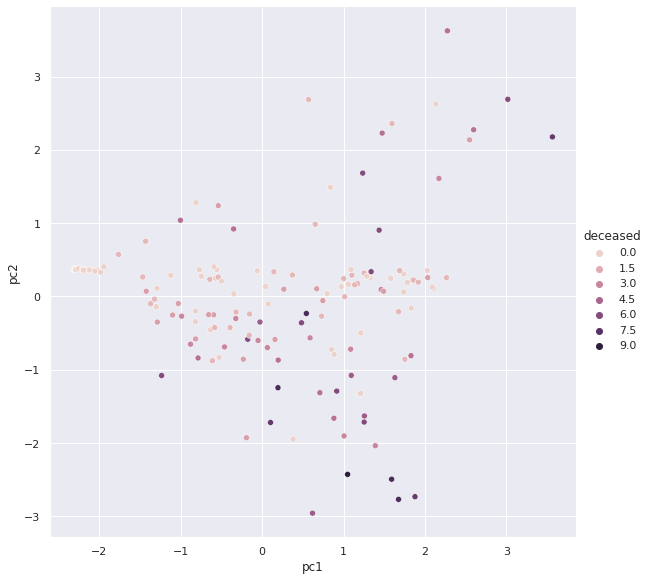

In [16]:
sns.relplot(x='pc1', y='pc2', data=df_pca, hue='deceased', height=8)

#### T-SNE

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state=42)

In [18]:
reduced_tsne = tsne.fit_transform(X)
principal = pd.DataFrame(data = reduced_tsne, columns = ['x_ax', 'y_ax'])
df_tsne = pd.concat([principal, target], axis = 1)

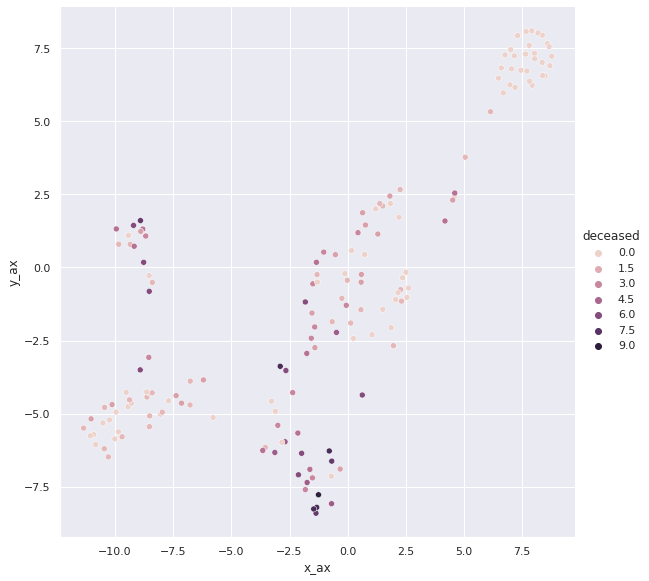

In [19]:
sns.relplot(x='x_ax', y='y_ax', data=df_tsne, hue='deceased', height=8)

### Clustering k-means

For simplicity lets say that deaths over 4.5 are high 

So will cluster into 2 groups hopping to get both of those groups

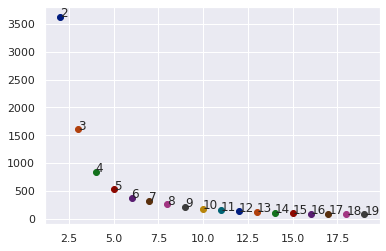

In [21]:
from sklearn.cluster import KMeans
# Finding n
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i).fit(reduced_tsne)
    plt.scatter(i, kmeans.inertia_)
    plt.annotate(str(i), (i, kmeans.inertia_))
# 5 seems to be the answer

#### Clustering T-SNE

In [22]:
kmeans = KMeans(n_clusters=5)

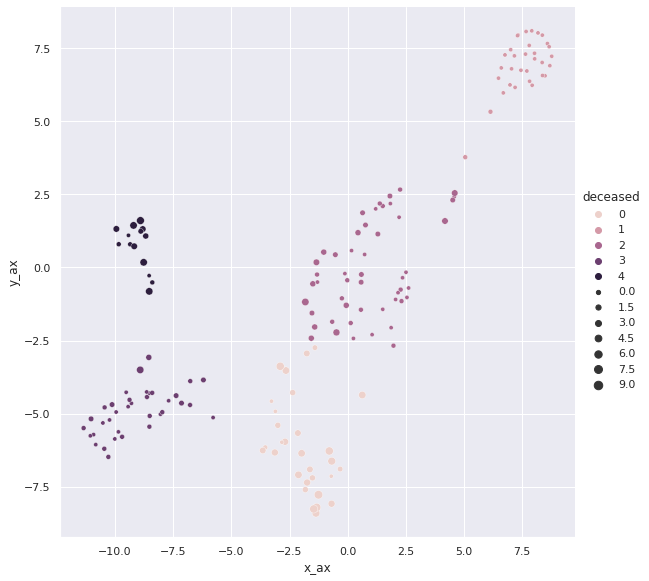

In [23]:
clusters = kmeans.fit_predict(reduced_tsne)
sns.relplot(x='x_ax', y='y_ax', data=df_tsne, hue=clusters, size="deceased", height=8)

#### Clustering PCA

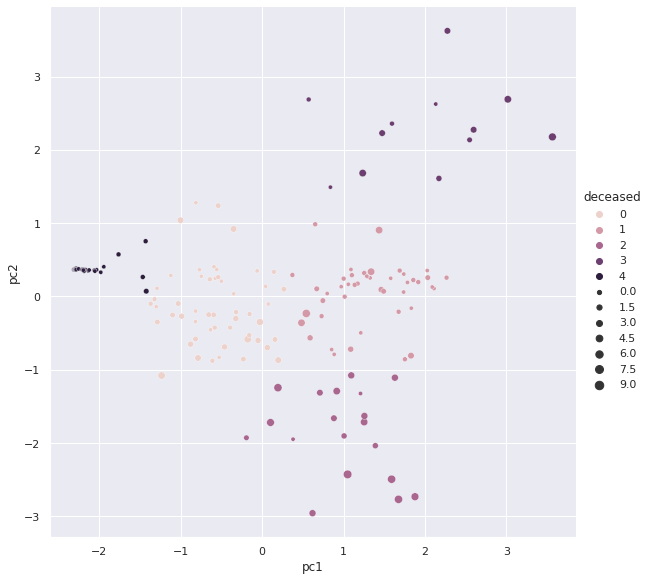

In [24]:
clusters = kmeans.fit_predict(reduced_pca)
sns.relplot(x='pc1', y='pc2', data=df_pca, hue=clusters, size="deceased", height=8)

### Modeling

Given the number of tests taken, their negative and positive proportions with addition to released patients predict the number of people who died

This model could be used to judge how country is dealing with COVID

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, target)
reg.score(X, target)

0.5139526955808857

### Conclusions

- Spread is the biggest in younger population while older people are in the most danger.

- Most people get the virus from travelling abroad (at least in the beggining). It seems reasonable that later younger people spread it accros population in places likes bars and schools or universities.  

- Policies seem to work in stopping the spread. Especially those closing schools and travelling. While it stops spread in younger people. Although, it doesn't affect older people. 

- Dimension reduction and clustering made clear that there is some corelation in numbers of positive cases and released patiants with deaths. Linear regression model got r^2 score of 51% proves that. 

    - This could be used to judge countries current state by comparing values from the model with the real values.

https://www.kaggle.com/kimjihoo/coronavirusdataset/

## Extra

#### 2016 US presidential elections

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1583340806569-6da3d5ea9911?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1315&q=80" /></div>

In 2016, Donald Trump lost the popular vote, yet he won the electoral vote, securing 4 years in the Oval Office. This has been a shock to democrat supporters all around the world.

Imagine you travel back in time to 2016. As soon as you step out of your time-capsule, the Democratic Party hires you. They want you, the best data scientist across the time and space, **to explain what happened and what should have been done differently**. They want you to **prepare them for 2020 presidential elections**.

The Party has some tips for you - inspect the voters. What are Trump supporters? What do they feature? What are our supporters? Where should focus next? Any pro-trump states? Cities?

The Democrats were kind of enough to share [a Kaggle dataset](https://www.kaggle.com/benhamner/2016-us-election) with you on 2016 U.S. elections. Use the data to help the Democrats.

#### Fatal Police Shooting in United States

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1606352466047-7cef02b312bb?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1662&q=80" /></div>

[Police brutality in the United States](https://en.wikipedia.org/wiki/Police_brutality_in_the_United_States) has been an nationwide issue since the 20th century. Public safety of U.S. citizens is a typical argument to justify the controversially high number of fatal shootings.

You are a contractor to the United States Department of Justice. **You have been given a case to investigate fatal police shootings throughout the United States of America, provide a list of issues, and propose a plan on how to tackle these issues**.

The department offered some tips - the public opinion indicates that there's something systematically fishy of police actions against civilians, some states differ from other, some cities are different from others, race equality is still an unanswered question, there's some talk about huge spendings on police, rumors about mental issues of those getting shot. Government is all about prioritizing - use the data to list issues with the police activity and propose a plan which issues to tackle first and how.

Your are given 1 dataset to start with. Try to search for more datasets to enrich your data analysis.

Here's the dataset:

* [Fatal Police Shootings in the U.S. '15 - '17](https://www.kaggle.com/washingtonpost/police-shootings).

# Evaluation Criteria

- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- Both PCA and T-SNE algorithms are used.